In [20]:
import sys
import os
import pickle
from tqdm import tqdm
from topolearn import *
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings("ignore")
import pandas as pd

prob_T=0.6

# Load the graph
G = EnhancedGraph(n=40, p_edges=0.162, p_triangles=prob_T, seed=0)
B1 = G.get_b1()
B2 = G.get_b2()

# Sub-sampling if needed to decrease complexity
sub_size = 100
B1 = B1[:, :sub_size]
B2 = B2[:sub_size, :]
B2 = B2[:,np.sum(np.abs(B2), 0) == 3]
nu = B2.shape[1] # N2
nd = B1.shape[1] # N1
T = int(np.ceil(nu*(1-prob_T)))

# Laplacians
Lu_true, Ld, L = G.get_laplacians(sub_size=100)
Lu_full = G.get_laplacians(sub_size=100, full=True)
B2_true = B2@G.mask
M =  L.shape[0]


# Problem and Dictionary Dimensionalities
dictionary_type="separated"
m_train = 150 # Number of Train Signals
m_test = 80 # Number of Test Signal
P = 3 # Number of Kernels (Sub-dictionaries)
J = 2 # Polynomial order
sparsity_mode = "random"
n_search = 3000
n_sim = 10

# Data-Independent Problem Hyperparameters
K0_max = 25
max_iter = 100 
patience = 5 
tol = 1e-3 # tolerance for Patience
lambda_ = 1e-7 # l2 multiplier
verbose = True



In [16]:
Ek = np.eye(1, B2.shape[1], 4)

In [19]:
True + True

2

In [45]:
import pandas as pd

# dir_path = f'{os.getcwd()}\\results\\final\\max_sparsity15'
path = os.getcwd()
# K0_coll = np.arange(5, 26, 10)
sub_size=100
K0_coll = np.array([5,15,25])
T_coll = [0.5, 0.6, 0.7, 0.8, 0.9]

In [68]:
curves_params = {
    "dictionary_type": "separated",
    "test_error": True,
    "sparsity_mode": "max",
    "sparsity": 15,
}
res_df = pd.DataFrame()
for s in K0_coll:
    for p in T_coll:
        try:
            try:
                res_path = f"{path}\\results\\final\\max_sparsity{s}\\res_separated_T{int(p*100)}_pess.pkl"
                data_path = f"{path}\\synthetic_data\\max_sparsity{s}\\top_data_T{int(p*100)}.pkl"
                print(f"Try {res_path}")

                with open(res_path, "rb") as file:
                    modsss = pickle.load(file)
                    resss = pickle.load(file)
            except:
                res_path = f"{path}\\results\\final\\max_sparsity{s}\\res_separated_T{int(p*100)}.pkl"
                data_path = f"{path}\\synthetic_data\\max_sparsity{s}\\top_data_T{int(p*100)}.pkl"
                print(f"Try {res_path}")

                with open(res_path, "rb") as file:
                    modsss = pickle.load(file)
                    resss = pickle.load(file)
        except:
            print(f"No {res_path}")
            continue

        curves_params["sparsity"] = s
        curves_params["algo_sparsity"] = s

        G = EnhancedGraph(
            n=40,
            p_edges=0.162,
            p_triangles=p,
            seed=0,
        )
        Lu, _, _ = G.get_laplacians(
            sub_size=sub_size
        )
        denom = np.linalg.norm(Lu)
        # res_df["Error"][res_df["Number of Triangles"]==(nu - int(np.ceil(nu * (1 - p))))] /= denom
        tmp_df = pd.DataFrame(resss["complete"][2])
        try:
            tmp_df.columns = K0_coll
        except:
            tmp_df= tmp_df[[0,2,5]]
            tmp_df.columns = K0_coll
        tmp_df = tmp_df.melt(
            var_name="Sparsity", value_name="Error"
        )
        tmp_df["Error"] /= denom
        tmp_df["\% of Triangles"] = nu - int(
            np.ceil(nu * (1 - p))
        )
        res_df = pd.concat([res_df, tmp_df])
res_df=res_df.reset_index(drop=True)

Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity5\res_separated_T50_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity5\res_separated_T60_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity5\res_separated_T70_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity5\res_separated_T80_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity5\res_separated_T90_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity15\res_separated_T50_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity15\res_separated_T60_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity15\res_separated_T70_pess.pkl
Try c:\Users\engri\Desktop\tesi\TSP-DictionaryLearning\results\final\max_sparsity15\res_separated_T80_pess.pkl
Try c:

In [69]:
res_df

,Sparsity,Error,\% of Triangles
0,5,0.953077,31
1,15,0.903721,31
2,25,0.965720,31
3,5,0.817382,37
4,15,0.761036,37
...,...,...,...
115,25,0.106938,55
116,25,0.191960,55
117,25,0.185223,55
118,25,0.249523,55


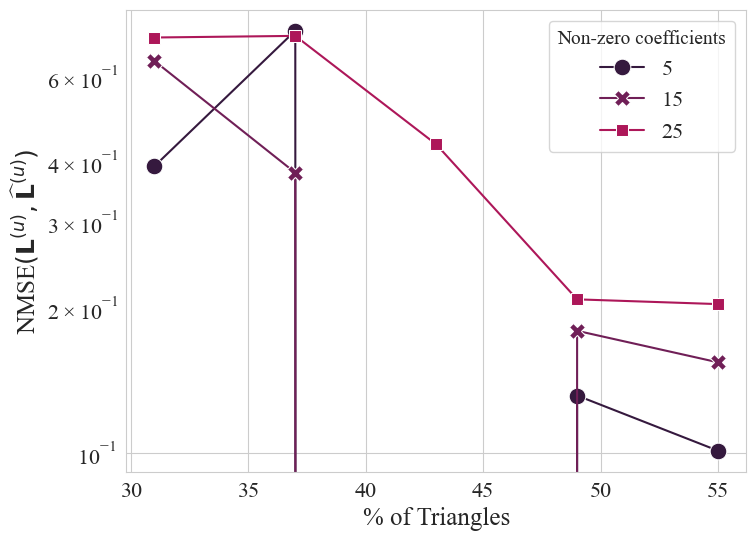

In [70]:
import matplotlib.pylab as pyl

sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['xtick.labelsize'] = 16 
plt.rcParams['ytick.labelsize'] = 16
plt.figure(figsize=(8, 6))
my_plt = sns.lineplot(
    data=res_df,
    x="\% of Triangles",
    y="Error",
    hue="Sparsity",
    style="Sparsity",
    markers=True,
    markersize=12,
    palette=sns.color_palette("rocket"),
    errorbar=None,
    estimator=np.mean,
    dashes=False
)

my_plt.set(yscale="log")
my_plt.set_ylabel(r"NMSE$(\mathbf{L}^{(u)},\widehat{\mathbf{L}}^{(u)})$", fontsize=18)
# my_plt.set_ylabel("Laplacian approx. error", fontsize=15)
my_plt.set_xlabel(f"% of Triangles", fontsize=18)
my_plt.yaxis.label.set_rotation(90)

# pyl.setp(my_plt.get_legend().get_texts(), fontsize="14")
# pyl.setp(my_plt.get_legend().get_title(), fontsize="14")

plt.legend(
    title="Non-zero coefficients",  # Set custom legend title
    fontsize=16,             # Set legend font size
    title_fontsize=14        # Set title font size
)
plt.savefig("LaplacianError.pdf", format="pdf")
plt.show()